# Air quality and Meteorological Conditions in Beijing

**The data used in this notebook was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data). The data consists of hourly data of six main air pollutants and six relevant meteorological variables at multiple sites in Beijing.**

In [1]:
#Importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import functions as f

In [2]:
#provide description for each columns
data = {
    'Column':['year', 'month', 'day', 'hour', 'pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'pres', 'dewp', 'rain', 'wd', 'wspm', 'station'],
    'Description': ['Year', 'Month', 'Day', 'Hour', 'PM2.5 concentration (ug/m^3)', 'PM10 concentration (ug/m^3)', 'Sulfur Dioxide concentration (ug/m^3)', 'Nitrogen Dioxide concentration (ug/m^3)', 'Carbon Monoxide concentration (ug/m^3)', 'Ozone concentration (ug/m^3)', 'Temperature (degree Celsius)', 'Pressure (hPa)', 'Dew Point Temperature (degree Celsius)', 'Precipitation (mm)', 'Wind Direction', 'Wind Speed (m/s)', 'Name of the Air-Quality Monitoring Site']
}

datainfo = pd.DataFrame(data)
datainfo

,Column,Description
0,year,Year
1,month,Month
2,day,Day
3,hour,Hour
4,pm2.5,PM2.5 concentration (ug/m^3)
5,pm10,PM10 concentration (ug/m^3)
6,so2,Sulfur Dioxide concentration (ug/m^3)
7,no2,Nitrogen Dioxide concentration (ug/m^3)
8,co,Carbon Monoxide concentration (ug/m^3)
9,o3,Ozone concentration (ug/m^3)


# 1. Data Cleaning

In [3]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("The configuration file was not found!")

In [4]:
config['data']['raw']['file2']

'../data/Raw/PRSA_Data_Dingling_20130301-20170228.csv'

In [5]:
#Loading Datas 
df_changping = pd.read_csv(config['data']['raw']['file1'])
df_dingling = pd.read_csv(config['data']['raw']['file2'])
df_dongsi = pd. read_csv(config['data']['raw']['file3'])
df_guanyuan = pd.read_csv(config['data']['raw']['file4'])
df_gucheng = pd.read_csv(config['data']['raw']['file5'])
df_huairou = pd.read_csv(config['data']['raw']['file6'])
df_nongzhanguan = pd.read_csv(config['data']['raw']['file7'])
df_shunyi = pd.read_csv(config['data']['raw']['file8'])
df_tiantan = pd.read_csv(config['data']['raw']['file9'])
df_wanliu = pd.read_csv(config['data']['raw']['file10'])
df_wanshouxigong = pd.read_csv(config['data']['raw']['file11'])
df_aotizhongxin = pd.read_csv(config['data']['raw']['file12'])

In [6]:
#Concatenate the dataframes into one
df = pd.concat([df_changping, df_dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong, df_aotizhongxin]).reset_index(drop = True)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [7]:
#Checking the shape of the dataframe. It has 420,768 rows and 18 columns. 
df.shape

(420768, 18)

In [8]:
df.duplicated().sum() #Counting the duplicated rows in the data

0

In [9]:
df.dtypes #Checking the data types of the columns

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [10]:
df.info() #Overview information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [11]:
#renaming all columns to be lowercase and removing white spaces
clean_df = df.copy()
clean_df = clean_df.rename(columns = lambda x: x.strip().lower())
clean_df.head()

,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


- **There seems to be a column that provides no value to our dataset.**
- **I will go ahead and remove this column first.**

In [12]:
#removing 'no' column
clean_df = clean_df.drop(['no'], axis = 1)
clean_df

,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
420764,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
420765,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
420766,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [13]:
#Checking for null values
print(clean_df.isna().any())
print("")
print("The columns with null values are:", clean_df.columns[clean_df.isna().any()].tolist())
print("")

year       False
month      False
day        False
hour       False
pm2.5       True
pm10        True
so2         True
no2         True
co          True
o3          True
temp        True
pres        True
dewp        True
rain        True
wd          True
wspm        True
station    False
dtype: bool

The columns with null values are: ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'pres', 'dewp', 'rain', 'wd', 'wspm']



In [14]:
#observe which rows in 'pm2.5' column has null values
clean_df[clean_df['pm2.5'].isna()]

,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
1308,2013,4,24,12,NaN,NaN,9.0000,33.0000,400.0,72.0000,22.6,999.2,-7.3,0.0,NNW,5.7,Changping
1309,2013,4,24,13,NaN,302.0,3.0000,16.0000,300.0,89.0000,23.4,998.7,-7.7,0.0,NNW,7.3,Changping
1814,2013,5,15,14,NaN,70.0,46.0000,22.0000,1100.0,157.0000,27.7,1005.8,2.0,0.0,SE,3.2,Changping
1815,2013,5,15,15,NaN,71.0,39.0000,19.0000,1100.0,188.0000,27.9,1005.2,4.2,0.0,SSE,1.6,Changping
2417,2013,6,9,17,NaN,NaN,5.9976,31.2056,NaN,18.6354,17.8,1003.4,15.8,0.1,NNW,0.4,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420584,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
420587,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
420589,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
420732,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


- **Because the dataset contains hhourly measurements of all variables, I believe the most appropriate approach to handling missing values is to use the forward-fill method.** 
- **Additionally, I have decided to start with filling the missing values before any form of data cleaning as I want to preserve the integerity of the dataset before proceeding with the the forward-fill method.**

In [15]:
#Fill missing values using the forward-fill method
clean_df = clean_df.ffill()
clean_df

,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
420764,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
420765,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
420766,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [16]:
#Check for remaining null values in data
remaining_null = clean_df.isna().sum()
remaining_null

year       0
month      0
day        0
hour       0
pm2.5      0
pm10       0
so2        0
no2        0
co         0
o3         0
temp       0
pres       0
dewp       0
rain       0
wd         0
wspm       0
station    0
dtype: int64

In [17]:
#checking for unique values in 'wd' column
clean_df['wd'].unique()

array(['E', 'ENE', 'NNE', 'N', 'NNW', 'NW', 'NE', 'SW', 'SSW', 'WSW',
       'ESE', 'SE', 'S', 'WNW', 'SSE', 'W'], dtype=object)

- **After observing the unique values for 'wd', I have decided to drop certain variables and keep the more traditional wind directions.**

In [18]:
#Dropping certain wind direction variables
drop_wd_variable = ['ENE', 'NNE', 'NNW', 'SSW', 'WSW', 'ESE', 'WNW', 'SSE']
variables_to_drop = clean_df[clean_df['wd'].isin(drop_wd_variable)].index
clean_df = clean_df.drop(variables_to_drop).reset_index(drop = True)
clean_df

,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
2,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
3,2013,3,1,10,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Changping
4,2013,3,1,12,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1023.8,-19.7,0.0,N,3.0,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223650,2017,2,28,14,5.0,5.0,4.0,8.0,100.0,117.0,14.6,1013.3,-15.6,0.0,N,3.6,Aotizhongxin
223651,2017,2,28,16,12.0,18.0,5.0,9.0,200.0,122.0,14.9,1012.6,-15.4,0.0,NW,2.1,Aotizhongxin
223652,2017,2,28,17,12.0,23.0,6.0,13.0,200.0,120.0,14.2,1012.5,-14.9,0.0,NW,3.1,Aotizhongxin
223653,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin


In [19]:
clean_df['wd'].unique()

array(['E', 'N', 'NW', 'NE', 'SW', 'SE', 'S', 'W'], dtype=object)

- **I will condense the 'year', 'month', and 'day' column into one to produce a traditional date format.**

In [20]:
#Create a 'date' column
clean_df['date'] = pd.to_datetime(clean_df[['year', 'month', 'day']])
#Extract the 'date' column
date_column = clean_df.pop('date')
#Insert the 'date' column to index 3
clean_df.insert(3, 'date', date_column)
clean_df

,year,month,day,date,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,2013-03-01,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,2013-03-01,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
2,2013,3,1,2013-03-01,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
3,2013,3,1,2013-03-01,10,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Changping
4,2013,3,1,2013-03-01,12,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1023.8,-19.7,0.0,N,3.0,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223650,2017,2,28,2017-02-28,14,5.0,5.0,4.0,8.0,100.0,117.0,14.6,1013.3,-15.6,0.0,N,3.6,Aotizhongxin
223651,2017,2,28,2017-02-28,16,12.0,18.0,5.0,9.0,200.0,122.0,14.9,1012.6,-15.4,0.0,NW,2.1,Aotizhongxin
223652,2017,2,28,2017-02-28,17,12.0,23.0,6.0,13.0,200.0,120.0,14.2,1012.5,-14.9,0.0,NW,3.1,Aotizhongxin
223653,2017,2,28,2017-02-28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin


- **When observing the units for different variables, the unit provided for wind speed is in 'm/s'. I have decided to convert the unit from m/s to km/h as this unit is more commonly used.**

In [21]:
#Define a function to convert unit for wind speed
#def wspm_conversion(m):
#    km = m * 3.6
#    return km

#Create a copy of the original dataset
df_clean = clean_df.copy()
#Use the apply method to convert all rows for wind speed
df_clean['wspm'] = clean_df['wspm'].apply(f.wspm_conversion)
df_clean.head()

,year,month,day,date,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,2013-03-01,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,1.80,Changping
1,2013,3,1,2013-03-01,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,7.56,Changping
2,2013,3,1,2013-03-01,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,9.00,Changping
3,2013,3,1,2013-03-01,10,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1025.1,-21.3,0.0,N,7.92,Changping
4,2013,3,1,2013-03-01,12,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1023.8,-19.7,0.0,N,10.80,Changping


- **I also noticed the unit for pressure is hPa. However, atm (SI unit for atmospheric pressure) is more commonly used.**

In [22]:
#Define a function to convert unit for pressure
#def pressure_conversion(p):
#    atm = p * 0.000987
#    return atm

#Use the apply method to convert all rows for pressure
df_clean['pres'] = df_clean['pres'].apply(f.pressure_conversion)
df_clean.head()

,year,month,day,date,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,2013-03-01,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1.007530,-19.7,0.0,E,1.80,Changping
1,2013,3,1,2013-03-01,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1.009010,-19.4,0.0,N,7.56,Changping
2,2013,3,1,2013-03-01,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1.011280,-20.0,0.0,NW,9.00,Changping
3,2013,3,1,2013-03-01,10,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1.011774,-21.3,0.0,N,7.92,Changping
4,2013,3,1,2013-03-01,12,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1.010491,-19.7,0.0,N,10.80,Changping


- **I have decided to group the month of the year into seasons in order to analyze whether levels of pollutions are higher during different seasons.**
- **Beijing has 4 seasons: Winter, Spring, Summer, and Autumn.**

In [23]:
#Defining a dictionary to be used for mapping
group = {1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 
         5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 
         9:'Autumn', 10:'Autumn', 11:'Autumn', 12:'Winter'}
#Using map() method
df_clean['season'] = df_clean['month'].map(group)
df_clean.head()
#Extract the 'season' column and adding to index 5
season_column = df_clean.pop('season')
df_clean.insert(5, 'season', season_column)
df_clean

,year,month,day,date,hour,season,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,2013-03-01,0,Spring,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1.007530,-19.7,0.0,E,1.80,Changping
1,2013,3,1,2013-03-01,4,Spring,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1.009010,-19.4,0.0,N,7.56,Changping
2,2013,3,1,2013-03-01,7,Spring,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1.011280,-20.0,0.0,NW,9.00,Changping
3,2013,3,1,2013-03-01,10,Spring,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1.011774,-21.3,0.0,N,7.92,Changping
4,2013,3,1,2013-03-01,12,Spring,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1.010491,-19.7,0.0,N,10.80,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223650,2017,2,28,2017-02-28,14,Winter,5.0,5.0,4.0,8.0,100.0,117.0,14.6,1.000127,-15.6,0.0,N,12.96,Aotizhongxin
223651,2017,2,28,2017-02-28,16,Winter,12.0,18.0,5.0,9.0,200.0,122.0,14.9,0.999436,-15.4,0.0,NW,7.56,Aotizhongxin
223652,2017,2,28,2017-02-28,17,Winter,12.0,23.0,6.0,13.0,200.0,120.0,14.2,0.999337,-14.9,0.0,NW,11.16,Aotizhongxin
223653,2017,2,28,2017-02-28,19,Winter,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1.000325,-16.2,0.0,NW,8.64,Aotizhongxin


In [24]:
df_clean['hour'].unique()

array([ 0,  4,  7, 10, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23,  3,  5, 17,
       19,  6,  1,  2,  9,  8, 11])

- **I also wanted to analyze whether pollution levels differ based on the time of day. As there are 24 hours in a day, I decided the best way to proceed would be to divide the day into 4: 'Night', 'Morning', 'Afternoon', and 'Evening.**

In [25]:
#grouping 'hour' into time of day
hour_grouped = {0:'Night', 1:'Night', 2:'Night', 3:'Night', 
                4:'Night', 5:'Night', 6:'Morning', 7:'Morning', 
                8:'Morning', 9:'Morning', 10:'Morning', 11:'Morning',
                12:'Afternoon', 13:'Afternoon', 14:'Afternoon', 15:'Afternoon',
                16:'Afternoon', 17:'Afternoon', 18:'Evening', 19:'Evening',
                20:'Evening', 21:'Evening', 22:'Evening', 23:'Evening'}
#Using map()
df_clean['time'] = df_clean['hour'].map(hour_grouped)
df_clean
#Extract the 'time' column and adding it to index 4
time_column = df_clean.pop('time')
df_clean.insert(4, 'time', time_column)
df_clean

,year,month,day,date,time,hour,season,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,1,2013-03-01,Night,0,Spring,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1.007530,-19.7,0.0,E,1.80,Changping
1,2013,3,1,2013-03-01,Night,4,Spring,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1.009010,-19.4,0.0,N,7.56,Changping
2,2013,3,1,2013-03-01,Morning,7,Spring,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1.011280,-20.0,0.0,NW,9.00,Changping
3,2013,3,1,2013-03-01,Morning,10,Spring,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1.011774,-21.3,0.0,N,7.92,Changping
4,2013,3,1,2013-03-01,Afternoon,12,Spring,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1.010491,-19.7,0.0,N,10.80,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223650,2017,2,28,2017-02-28,Afternoon,14,Winter,5.0,5.0,4.0,8.0,100.0,117.0,14.6,1.000127,-15.6,0.0,N,12.96,Aotizhongxin
223651,2017,2,28,2017-02-28,Afternoon,16,Winter,12.0,18.0,5.0,9.0,200.0,122.0,14.9,0.999436,-15.4,0.0,NW,7.56,Aotizhongxin
223652,2017,2,28,2017-02-28,Afternoon,17,Winter,12.0,23.0,6.0,13.0,200.0,120.0,14.2,0.999337,-14.9,0.0,NW,11.16,Aotizhongxin
223653,2017,2,28,2017-02-28,Evening,19,Winter,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1.000325,-16.2,0.0,NW,8.64,Aotizhongxin


- **To finalize the data cleaning process and derive a final DataFrame, I will drop the remaining columns that will not provide much value to the analysis**

In [26]:
#As the final dataframe, drop columns 'day' and 'hour'
final_df = df_clean.copy()
final_df = df_clean.drop(['day', 'hour'], axis=1)
display(final_df.head())
display(final_df.tail())
print("")

#Display the number of rows and columns in the final dataset
num_rows = final_df.shape[0]
num_cols = final_df.shape[1]
print(f"The final DataFrame has {num_rows} rows and {num_cols} columns")
print("")

,year,month,date,time,season,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,2013-03-01,Night,Spring,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1.007530,-19.7,0.0,E,1.80,Changping
1,2013,3,2013-03-01,Night,Spring,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1.009010,-19.4,0.0,N,7.56,Changping
2,2013,3,2013-03-01,Morning,Spring,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1.011280,-20.0,0.0,NW,9.00,Changping
3,2013,3,2013-03-01,Morning,Spring,9.0,10.0,3.0,10.0,300.0,83.0,2.0,1.011774,-21.3,0.0,N,7.92,Changping
4,2013,3,2013-03-01,Afternoon,Spring,3.0,6.0,4.0,8.0,300.0,90.0,4.8,1.010491,-19.7,0.0,N,10.80,Changping


,year,month,date,time,season,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
223650,2017,2,2017-02-28,Afternoon,Winter,5.0,5.0,4.0,8.0,100.0,117.0,14.6,1.000127,-15.6,0.0,N,12.96,Aotizhongxin
223651,2017,2,2017-02-28,Afternoon,Winter,12.0,18.0,5.0,9.0,200.0,122.0,14.9,0.999436,-15.4,0.0,NW,7.56,Aotizhongxin
223652,2017,2,2017-02-28,Afternoon,Winter,12.0,23.0,6.0,13.0,200.0,120.0,14.2,0.999337,-14.9,0.0,NW,11.16,Aotizhongxin
223653,2017,2,2017-02-28,Evening,Winter,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1.000325,-16.2,0.0,NW,8.64,Aotizhongxin
223654,2017,2,2017-02-28,Evening,Winter,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1.001015,-13.3,0.0,NW,3.96,Aotizhongxin



The final DataFrame has 223655 rows and 18 columns



In [27]:
final_df.info() #Summary information about the final dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223655 entries, 0 to 223654
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   year     223655 non-null  int64         
 1   month    223655 non-null  int64         
 2   date     223655 non-null  datetime64[ns]
 3   time     223655 non-null  object        
 4   season   223655 non-null  object        
 5   pm2.5    223655 non-null  float64       
 6   pm10     223655 non-null  float64       
 7   so2      223655 non-null  float64       
 8   no2      223655 non-null  float64       
 9   co       223655 non-null  float64       
 10  o3       223655 non-null  float64       
 11  temp     223655 non-null  float64       
 12  pres     223655 non-null  float64       
 13  dewp     223655 non-null  float64       
 14  rain     223655 non-null  float64       
 15  wd       223655 non-null  object        
 16  wspm     223655 non-null  float64       
 17  station  2

In [28]:
final_df.dtypes #Summary of datatypes of each column of final dataframe

year                int64
month               int64
date       datetime64[ns]
time               object
season             object
pm2.5             float64
pm10              float64
so2               float64
no2               float64
co                float64
o3                float64
temp              float64
pres              float64
dewp              float64
rain              float64
wd                 object
wspm              float64
station            object
dtype: object

In [29]:
#Save the cleaned dataframe to a new csv file
final_df.to_csv('cleaned_data.csv')

# Exploratory Data Analysis

- **Majority of the AQI includes PM2.5 and PM10 to assess air quality. As such, I have chosen to focus on these two variables for my analysis and I will be dropping the other four variables from the dataset.**

In [30]:
#Dropping 'no2', '03', 'so2', and 'co'
df_final = final_df.copy()
df_final.drop(['no2', 'o3', 'so2', 'co'], axis = 1, inplace = True)
df_final

,year,month,date,time,season,pm2.5,pm10,temp,pres,dewp,rain,wd,wspm,station
0,2013,3,2013-03-01,Night,Spring,3.0,6.0,-2.3,1.007530,-19.7,0.0,E,1.80,Changping
1,2013,3,2013-03-01,Night,Spring,3.0,3.0,-3.5,1.009010,-19.4,0.0,N,7.56,Changping
2,2013,3,2013-03-01,Morning,Spring,3.0,6.0,-2.1,1.011280,-20.0,0.0,NW,9.00,Changping
3,2013,3,2013-03-01,Morning,Spring,9.0,10.0,2.0,1.011774,-21.3,0.0,N,7.92,Changping
4,2013,3,2013-03-01,Afternoon,Spring,3.0,6.0,4.8,1.010491,-19.7,0.0,N,10.80,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223650,2017,2,2017-02-28,Afternoon,Winter,5.0,5.0,14.6,1.000127,-15.6,0.0,N,12.96,Aotizhongxin
223651,2017,2,2017-02-28,Afternoon,Winter,12.0,18.0,14.9,0.999436,-15.4,0.0,NW,7.56,Aotizhongxin
223652,2017,2,2017-02-28,Afternoon,Winter,12.0,23.0,14.2,0.999337,-14.9,0.0,NW,11.16,Aotizhongxin
223653,2017,2,2017-02-28,Evening,Winter,12.0,29.0,12.5,1.000325,-16.2,0.0,NW,8.64,Aotizhongxin


### Question: Which District in Beijing Recorded the Highest Average PM2.5 and PM10 Levels?

In [31]:
#Which station reported the highest average air pollutant
avg_pollutant = df_final.groupby('station')[['pm2.5', 'pm10']].mean()
display(avg_pollutant)

,pm2.5,pm10
station,,
Aotizhongxin,83.239629,110.681309
Changping,70.525188,94.017273
Dingling,66.812441,82.876521
Dongsi,85.874713,110.956348
Guanyuan,83.005312,109.206787
Gucheng,86.222961,120.936056
Huairou,69.956717,92.054206
Nongzhanguan,84.835573,109.476877
Shunyi,79.804515,99.568436


PM2.5 are atmospheric aerosols with a maximum diameter of 2.5 micrometers. This type of suspended particulate matter is considered the most dangerous to human health. This is due to its very fine nature, and its ability to penetrate directly into the bloodstream.

According to the [Common Air Quality Index](https://airly.org/en/air-quality-index-caqi-and-aqi-methods-of-calculation/):
<br>
**PM 2.5**
<br>
***Low*** *(Green)*: 0 - 29 µg/m³
<br>
***Medium*** *(Yellow)*: 30 - 54 µg/m³
<br>
***High*** *(Orange)*: 55 - 110 µg/m³
<br>
***Very High*** *(Red)*: > 110 µg/m³

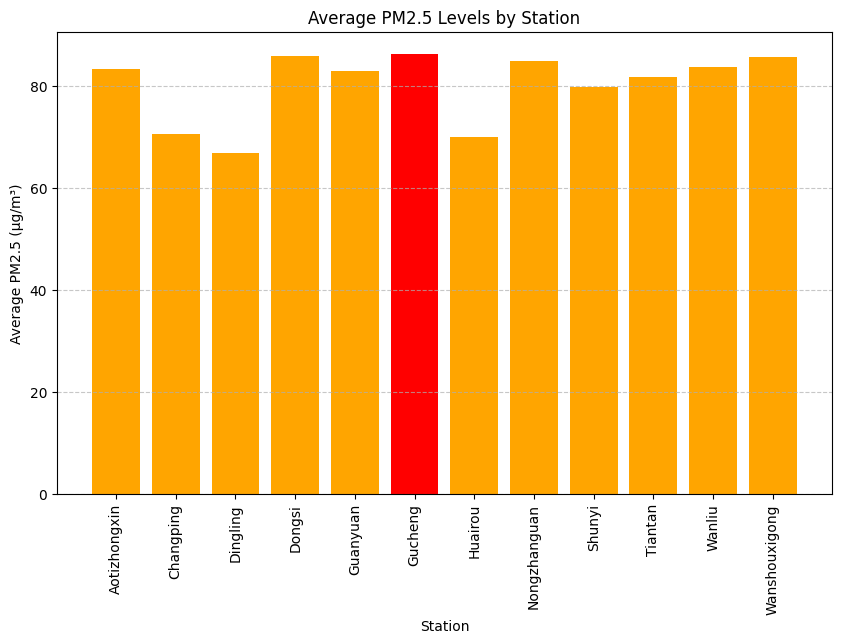

In [32]:
#Average pm2.5 levels by station
avg_pm25_values = avg_pollutant['pm2.5']  # Average pm2.5 values
station_names = avg_pm25_values.index

# Define color mapping function for pm2.5
#def get_pm25_color(value):
#    if value > 86:
#       return 'red'
#    if value > 55 and value <=110:
#        return 'orange'
#    if value >30 and value <= 55:
#        return 'yellow'
#    if value <= 30:
#        return 'green'

# Plotting bar chart for pm2.5 pollutant
plt.figure(figsize=(10, 6))
colors = [f.get_pm25_color(value) for value in avg_pm25_values]
plt.bar(station_names, avg_pm25_values, color=colors)
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

PM10 is a mixture of particles suspended in the air that do not exceed 10 micrograms in diameter. It is harmful because it contains benzopyrenes, furans, dioxins and in short, carcinogenic heavy metals.

According to the [Common Air Quality Index](https://airly.org/en/air-quality-index-caqi-and-aqi-methods-of-calculation/):
<br>
**PM 10**
<br>
***Low*** *(Green)*: 0 - 49 µg/m³
<br>
***Medium*** *(Yellow)*: 50 - 89 µg/m³
<br>
***High*** *(Orange)*: 90 - 180 µg/m³
<br>
***Very High*** *(Red)*: > 180 µg/m³

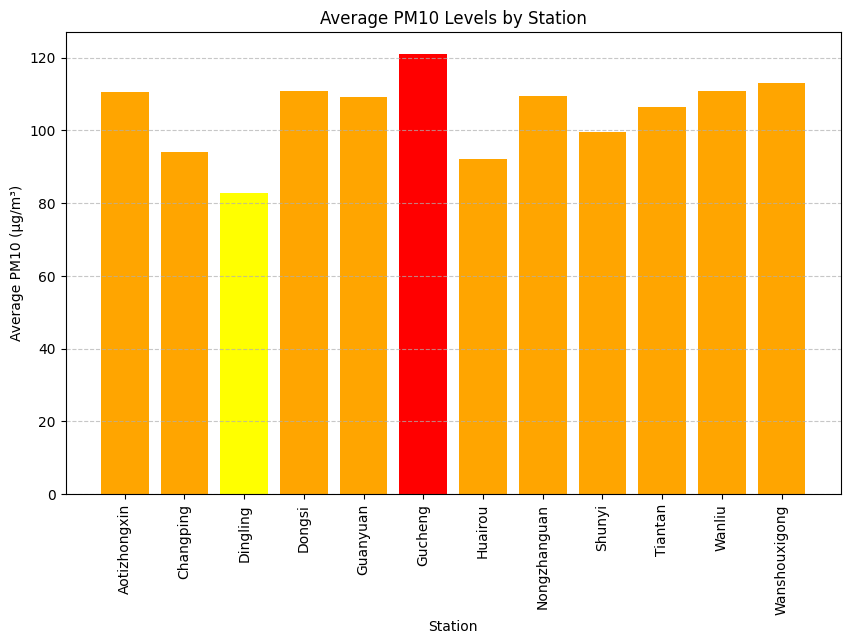

In [33]:
#Average pm10 levels by station
avg_pm10_values = avg_pollutant['pm10']
station_names = avg_pm10_values.index

# Define color mapping function for pm10
#def get_pm10_color(value):
#    if value > 120:
#        return 'red'
#    if value > 90 and value <=180:
#        return 'orange'
#    if value >50 and value <= 90:
#        return 'yellow'
#    if value <= 50:
#        return 'green'

plt.figure(figsize=(10, 6))
colors = [f.get_pm10_color(value) for value in avg_pm10_values]
plt.bar(station_names, avg_pm10_values, color=colors)
plt.title('Average PM10 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM10 (µg/m³)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **The colors of the bar in the plot above corresponds to the air quality index. All districts recorded high levels of PM2.5. All districts also recorded high levels of PM10, except for Dingling which recorded medium levels of PM10.**
- **Based on the two barplots above, we can see that among the 12 districts, Gucheng has the highest average levels of both PM2.5 and PM10. This is followed by Dongsi and Aotizhongxin as having the highest levels of PM2.5 and PM10.** 
- **On the other hand, the Dingling district recorded the lowest average levels of both PM2.5 and PM10.**

### Question: What is the Effect of Time on Pollution Levels in Beijing?
Observing how level of pollutants change over time

Lets start by looking at how daily average PM2.5 and PM10 levels differ between 2013 and 2017

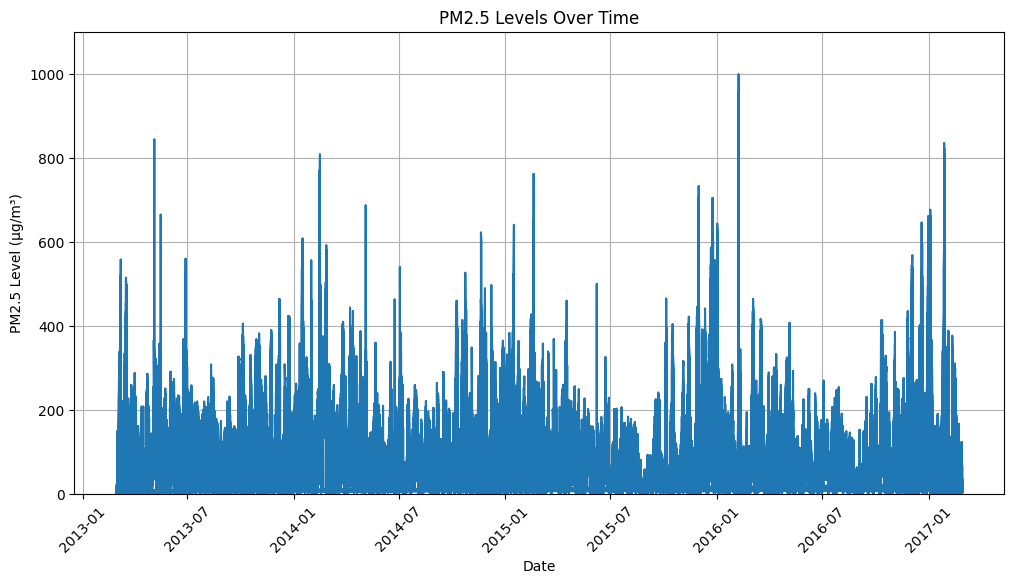

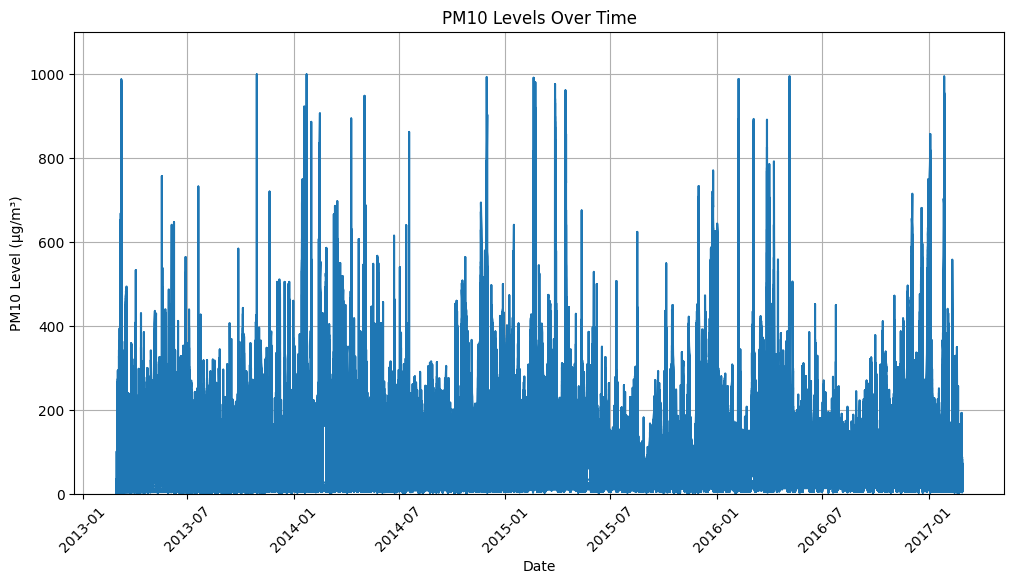

In [34]:
#Plot average levels of 'PM2.5' over the periods of 2013 to 2017
plt.figure(figsize=(12, 6))
plt.plot(df_final['date'], df_final['pm2.5'])
plt.ylim(0, 1100)
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level (µg/m³)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

#Plot average levels of 'PM10' over the periods of 2013 to 2017
plt.figure(figsize=(12,6))
plt.plot(df_final['date'], df_final['pm10'])
plt.ylim(0, 1100)
plt.title('PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10 Level (µg/m³)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

- **We can see that between Jan 2013 to Jan 2017, the safety level for both PM2.5 (<55 µg/m³) and PM10 (<90 µg/m³) has been exceeded every year. Certain days have even recorded levels surpassing hazardous levels of 1000 µg/m³.**
- **We can also already see that the highest average levels of PM2.5 and PM10 seem to be recorded during the start and end of every year. We will explore this further later on in the analysis.**

Now I will check to see which year had the highest levels of PM2.5 and PM10

,year,pm2.5,pm10
0,2013,81.047973,104.422525
1,2014,87.305062,118.175727
2,2015,79.362421,103.978311
3,2016,72.039802,94.263786
4,2017,88.269032,107.247761


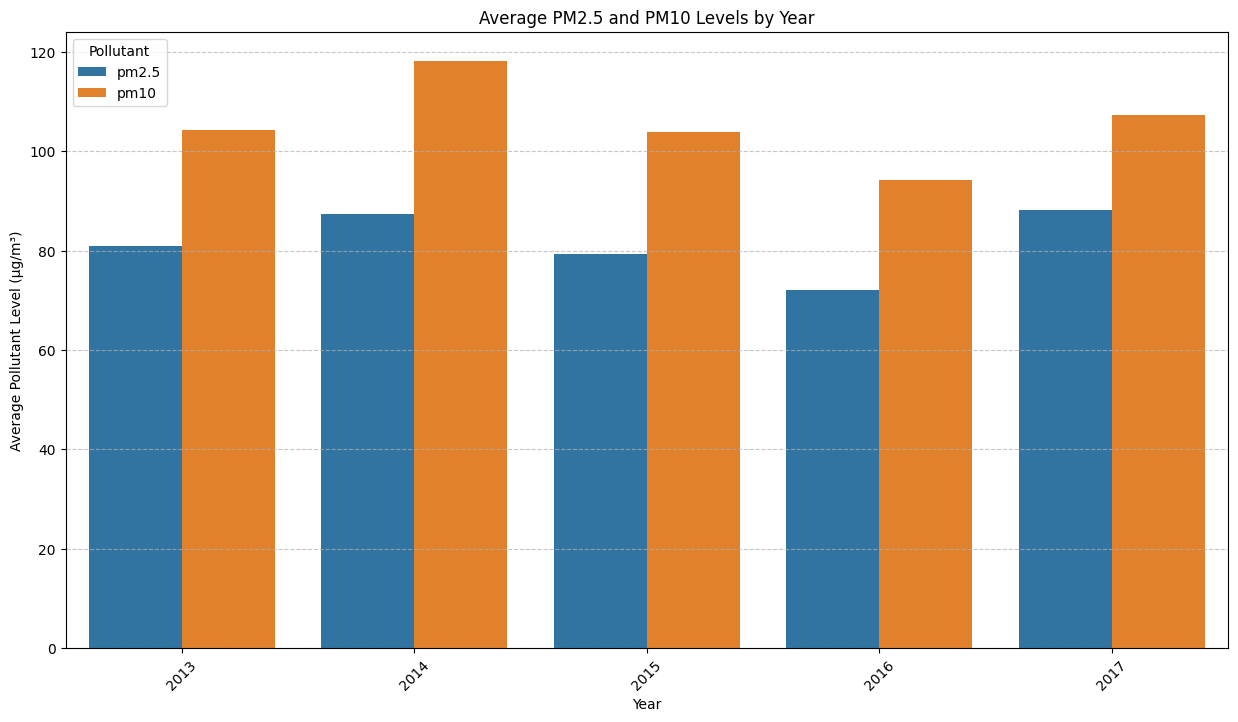

In [35]:
#Group pm2.5 and pm10 by 'year' and reset index to have 'year' as a column
pm_over_year = df_final.groupby('year')[['pm2.5', 'pm10']].mean().reset_index()
display(pm_over_year)

# Melt the DataFrame to long format for seaborn
pm_over_year_melted = pm_over_year.melt(id_vars='year', var_name='Pollutant', value_name='Average Level')

# Plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=pm_over_year_melted, x='year', y='Average Level', hue='Pollutant')
plt.title('Average PM2.5 and PM10 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Pollutant Level (µg/m³)')
plt.legend(title='Pollutant', loc = 'upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **We can see from the barplot above, the year 2014 produced the highest average levels of PM10 and 2017 produced the highest average levels of PM2.5. 2016 recorded the lowest levels of both PM2.5 and PM10.**
- **We can also derive from the barplot that every year recorded dangerous levels of pollutants in the air.**

Lets explore this further and observe how levels of pollutants vary per season

,season,pm2.5,pm10
0,Autumn,82.780048,103.962924
1,Spring,77.543685,121.284800
2,Summer,64.738110,81.006333
3,Winter,95.531739,114.631716


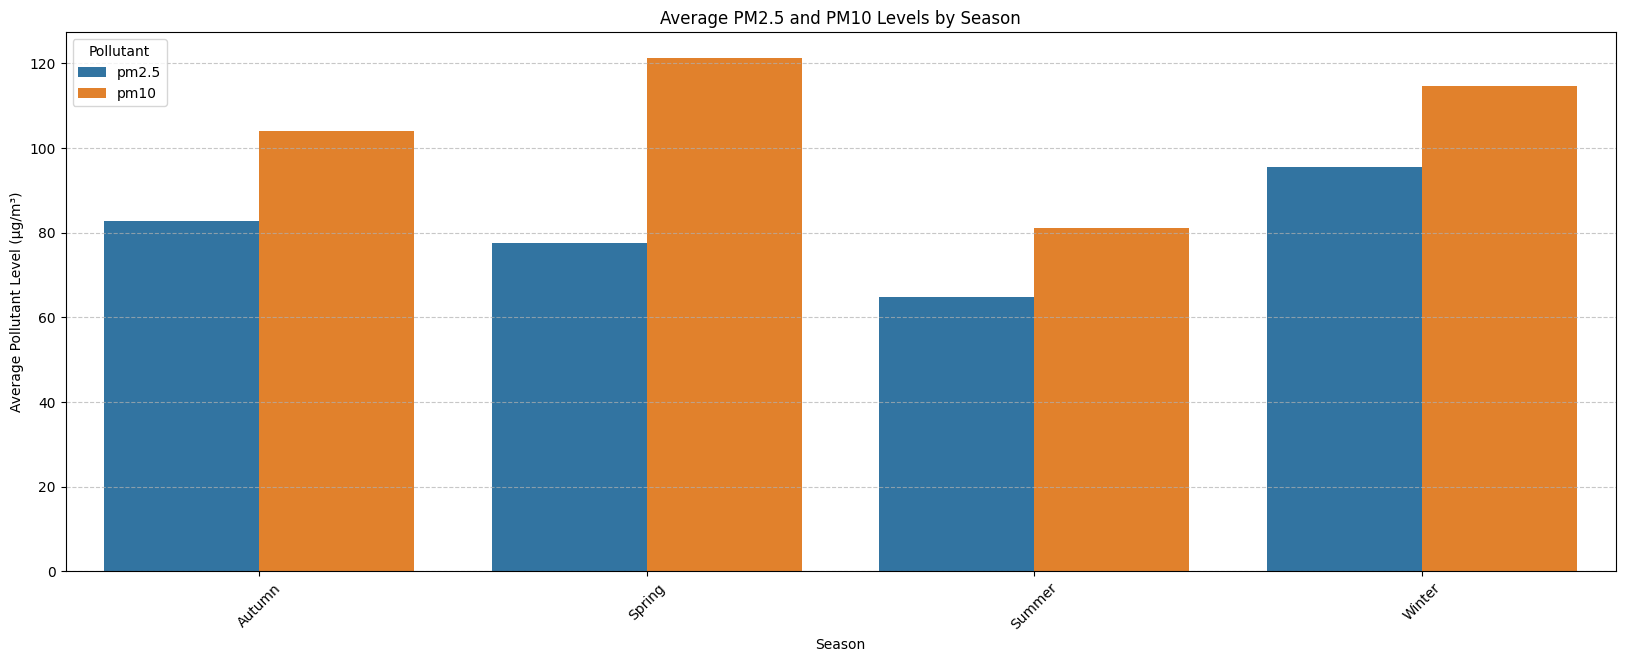

In [36]:
#aggregating pm2.5 and pm10 by season
season_pm = df_final.groupby('season')[['pm2.5', 'pm10']].mean().reset_index()
display(season_pm)

# Melt the DataFrame to long format for seaborn
season_pm_melted = season_pm.melt(id_vars='season', var_name='Pollutant', value_name='Average Level')

#Plot average pollutant levels per season using seaborn
plt.figure(figsize=(20, 7))
sns.barplot(data=season_pm_melted, x='season', y='Average Level', hue='Pollutant')
plt.title('Average PM2.5 and PM10 Levels by Season')
plt.xlabel('Season')
plt.ylabel('Average Pollutant Level (µg/m³)')
plt.legend(title='Pollutant', loc = 'upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **As shown in the plot above, there are strong seasonal dependencies of pollutants, leading to substantial seasonal variation in the average concentration of PM2.5 and PM10.**
- **Highest average levels of PM2.5 were recorded during the winter time (Dec, Jan, Feb), followed closely by autumn (Sep, Oct, Nov).**
- **While concentrations of PM2.5 in the spring are relatively lower, PM10 concentration is highest during spring. This, most likely, is due to pollination during these months, as pollen is a type of PM10. Additionally, Beijing is regularly hit with sandstorms in the spring with the smog made worse by rising industrial activities and rapid deforestation.**

Lets find an explanation for why air pollutant levels are higher during winter periods:

month
1     -1.853556
2      1.087729
3      8.299182
4     15.189567
5     21.460968
6     24.490941
7     27.056496
8     26.573491
9     20.623238
10    13.249393
11     4.728771
12    -0.211298
Name: temp, dtype: float64

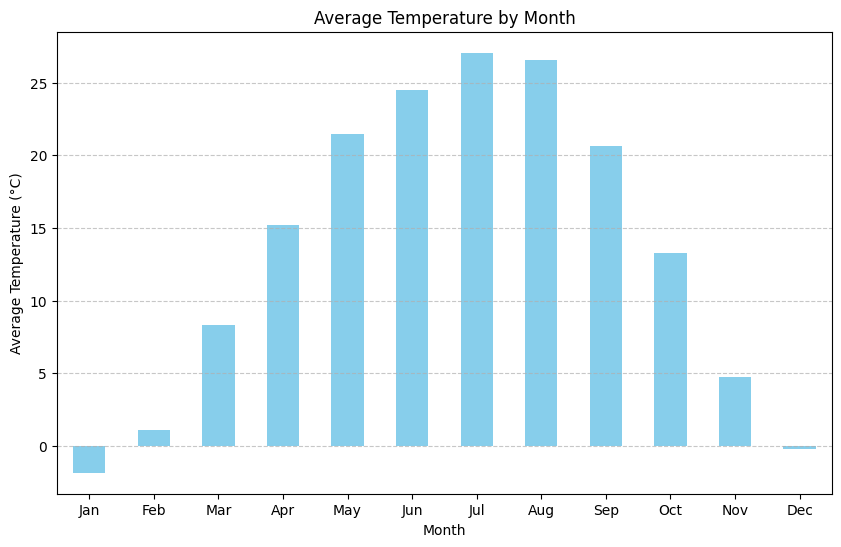

In [37]:
# Grouping by month and calculating the mean temperature
temp_over_year = df_final.groupby('month')['temp'].mean()
display(temp_over_year)

#Plot average temperatures per month using seaborn
plt.figure(figsize=(10, 6))
temp_over_year.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **The winter periods in Beijing are the coldest. Therefore, a possible explanation for higher levels of pollutants during these months is the increased coal burning for heating.**
- **Another explanation is that cold air is denser and moves slower than warm air. This density means that cold air traps the pollution and the particles remain in place for much longer.**
- **In an attempt to improve air quality during these months, the Chinese authority could consider incentivizing cleaner methods of heating, such as electricity or natural gases. These alternatives are considered cleaner and more efficient than its counterparts.** 

Finally, I will explore how PM levels differ depending on the time of day

,pm2.5,pm10
time,,
Afternoon,75.763363,98.357715
Evening,87.007986,120.011124
Morning,75.181696,97.113600
Night,82.837535,105.149989


<Figure size 1000x600 with 0 Axes>

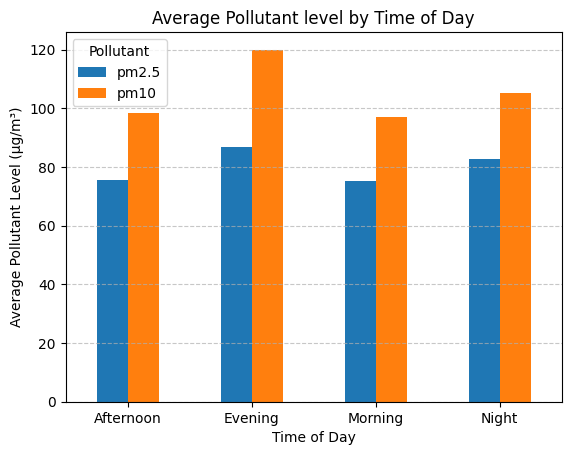

In [38]:
# Grouping by time of day and calculating the mean pm2.5 and pm10
time_pm = df_final.groupby('time')[['pm2.5', 'pm10']].mean()
display(time_pm)

# Plotting
plt.figure(figsize=(10, 6))
time_pm.plot(kind='bar')
plt.title('Average Pollutant level by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pollutant Level (µg/m³)')
plt.legend(title='Pollutant', loc = 'upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **Based on the plot, the average PM2.5 and PM10 levels are lowest in the morning and highest in the evening.**
- **During the day, the sun heats up the ground, causing the air to rise and creating wind. On the other hand, at night time, the ground cools down which reduces the wind speed. With less wind to disperse pollutants, they tend to accumulate and settle near the surface.**

# Meteorological Conditions and Air Quality

### Question: Does Wind Speed Affect Air Quality?

month
1     6.804466
2     7.169082
3     7.024954
4     7.664601
5     7.381151
6     5.613439
7     5.239315
8     5.115188
9     4.777801
10    4.737521
11    5.519818
12    6.390420
Name: wspm, dtype: float64

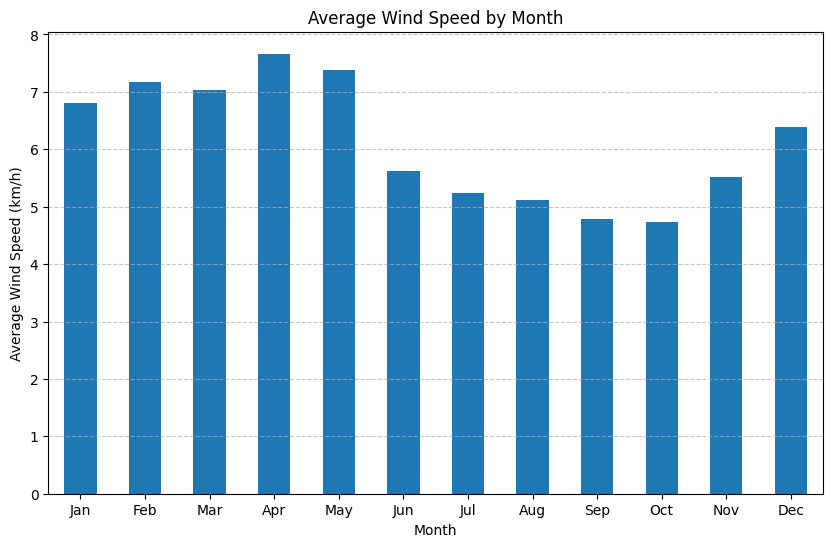

In [39]:
#Grouping average windspeed by month
wspm_by_month = df_final.groupby('month')['wspm'].mean()
display(wspm_by_month)

# Plotting the average wind speed by month
plt.figure(figsize=(10, 6))
wspm_by_month.plot(kind='bar')
plt.title('Average Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (km/h)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

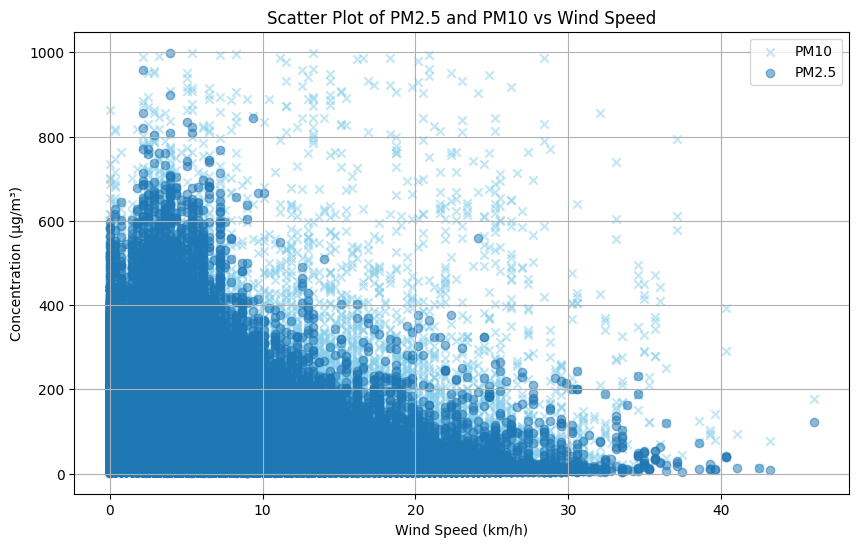

In [40]:
#Specific size of the plot
plt.figure(figsize=(10, 6))

# Scatter plot for PM10
plt.scatter(df_final['wspm'], df_final['pm10'], alpha=0.5, label='PM10', marker='x', color='skyblue')

#Scatter plot for pm2.5
plt.scatter(df_final['wspm'], df_final['pm2.5'], alpha=0.5, label='PM2.5')

#Determine characteristics of the scatter plot
plt.title('Scatter Plot of PM2.5 and PM10 vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

- **This further confirms the previous finding regarding pollutant concentration and time of day. We can see that the concentration is higher when the wind speed is lowest and lower concentrations were recorded when wind speed was higher.**
- **The higher the wind speed, the more contaminants are dispersed and the lower their concentration.**

### Question: Does Precipitation Affect Air Quality?

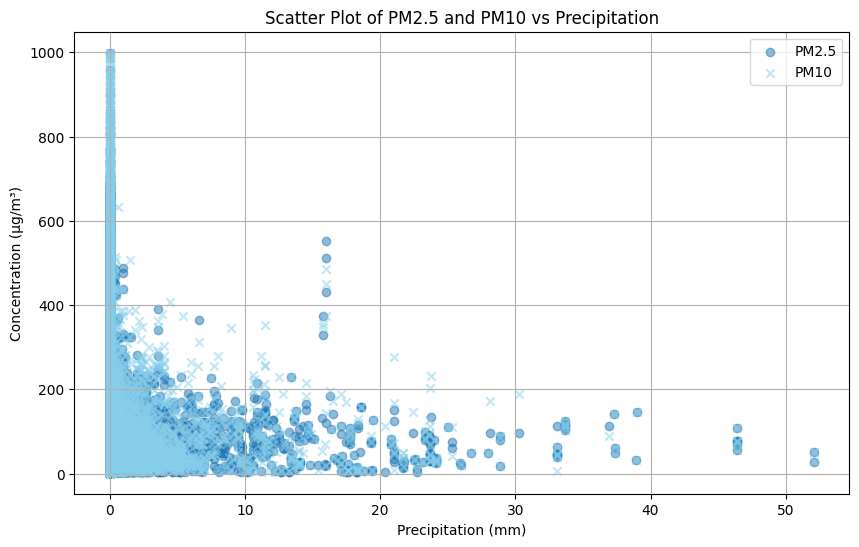

In [41]:
#Specify size of the plot
plt.figure(figsize=(10, 6))

#Scatter plot for pm2.5
plt.scatter(df_final['rain'], df_final['pm2.5'], alpha=0.5, label='PM2.5')

# Scatter plot for PM10
plt.scatter(df_final['rain'], df_final['pm10'], alpha=0.5, label='PM10', marker='x', color='skyblue')

#Determine characteristics of the scatter plot
plt.title('Scatter Plot of PM2.5 and PM10 vs Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

- **On rainy days, rain droplets forces down the most common air pollutants, like particulate matter and pollen down. Thereby, the quality of air becomes drastically better. This phenomenon is called wet deposition.**
- **While the pollutants are washed out or dispersed, they are not gone. They have just been transported to another location. For instance, they may end up in bodies of water or in someone's lungs.**
- **This is confirmed by the plot above. On days with heavier precipitation, we see a lower concentration of pollutants recorded.**
- **Advised that individuals with health concerns minimize exposure to the outdoors or consider wearing a face mask to prevent inhalation of pollutant.**

### Question: Does Pressure Affect Air Quality?

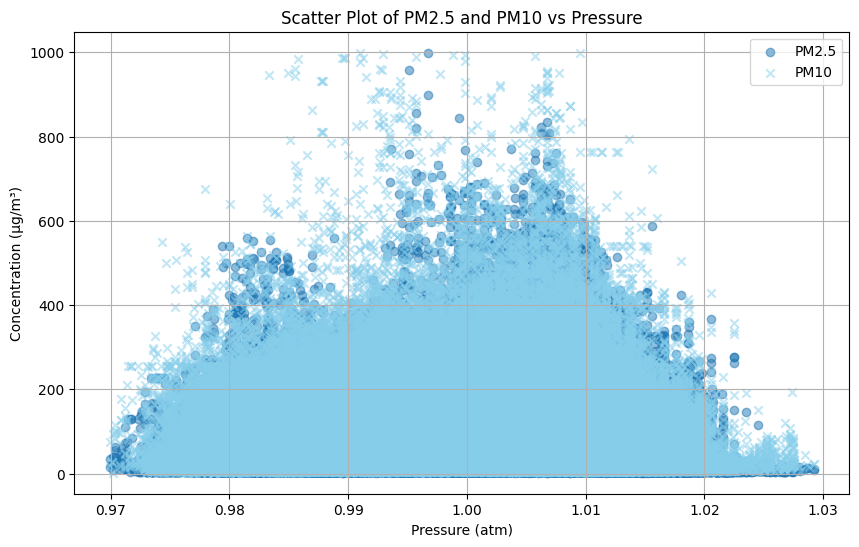

In [42]:
#Specify size of the plot
plt.figure(figsize=(10, 6))

#Scatter plot for pm2.5
plt.scatter(df_final['pres'], df_final['pm2.5'], alpha=0.5, label='PM2.5')

# Scatter plot for PM10
plt.scatter(df_final['pres'], df_final['pm10'], alpha=0.5, label='PM10', marker='x', color='skyblue')

#Determine characteristics of the scatter plot
plt.title('Scatter Plot of PM2.5 and PM10 vs Pressure')
plt.xlabel('Pressure (atm)')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

- **Although the pressure throughout the dataset does not vary significantly, we can see that the pollutant concentration tended towards 1.00 atm which is the average pressure at mean sea level.**
- **Low-pressure conditions bring wet and windy conditions. A passing storm front can wash pollutants out of the atmosphere or transport them to a new area. This explains why lower concentration of pollutants can be observed at lower pressure levels.**
- **The opposite is true of high-pressure conditions, which can create stagnant air. When the air stops moving, pollutants concentrate over an area.**